### 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

When a Machine Learning model is underfitting, it means it isn't learning much from the training data, or, very little.

The disadventage of underfit models is that they don't have enough information or the target variable. The objective of any Machine Learning technique is to acquire, or "learn" trends in the data by imitating how it was presented through examples withouth explaining what those thends are.

If no such patterns exist in our data (or if they are too weakly defined), the machine can only fabricate things that aren't there and create predictions that don't hold true in reality.

1. Increasing the Model COmplexity
It's possible that your model is underfitting because it isn't robust enough to capture trends in the data. Using a more sophisticated model, for example by changing from a linear to a non-linear approach or by adding hidden layers to you Neural Network, may be very beneficial in this situation.

2. Reducing Regularization
By default, the algorithms you employ include regularization parameters to prevent overfitting. Thus, they sometimes hinder the algorithm from learning. Slight adjustments to their settings usually assist when trying to reduce uderfit.

3. Adding Features to Training Data.
As opposed to overfitting, your model may be underfitting if the training data is too limited or simple. If your model is underfitting, it may not have the characteristics required to identify key patterns and make accurate forecasts and predictions.
However, underfitting can be alleviated by adding features and complexity to your data.


### 2. Recreate the data loading functions we built in sections 1, 2, 3 and 4. You should have train and test DataLoader's ready to use.

In [1]:
# 0. Importing PyTorch and setting up device-agnostic code
import torch
from torch import nn

torch.__version__

'2.3.0+cu121'

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it..

if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print(f"Downloading pizza, steak, sushi data...")
  f.write(request.content)

# unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak and sushi data


In [4]:
# 2. Becoming one with the data (data preparation and data exploration)
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'


In [6]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/pizza/3281494.jpg
Image class: pizza
Image height: 288
Image width: 512


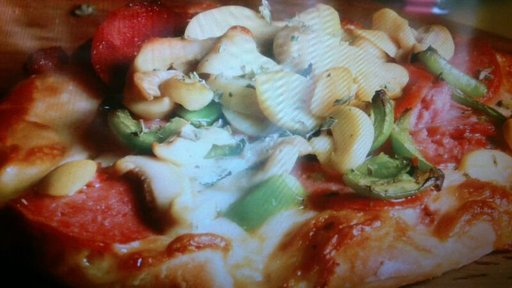

In [7]:
# visualizing an image
import random
from PIL import Image

# set seed
# random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 287.5, -0.5)

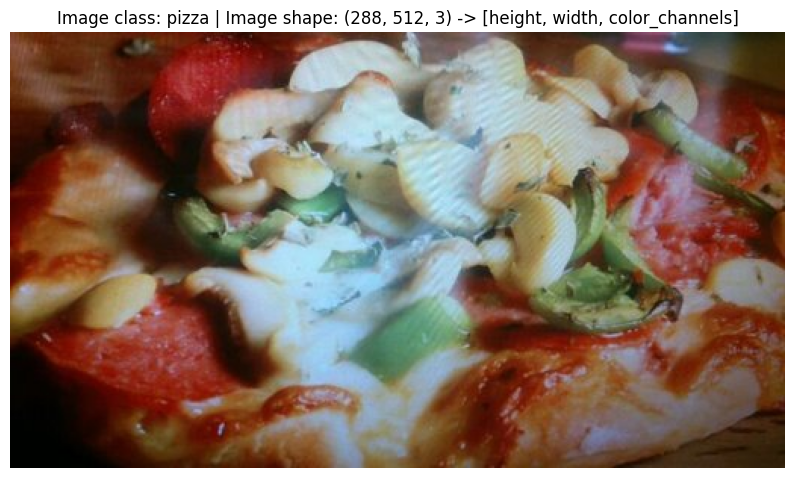

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

In [11]:
# 3. Transforming data
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [12]:
data_transform(img).shape

torch.Size([3, 64, 64])

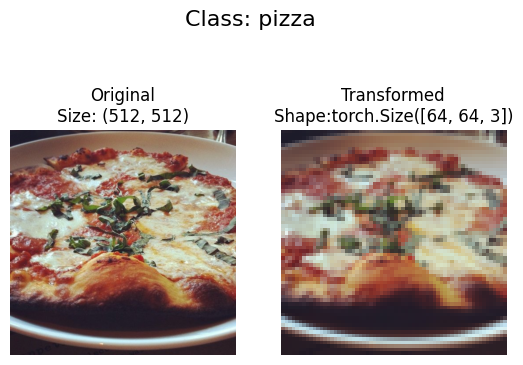

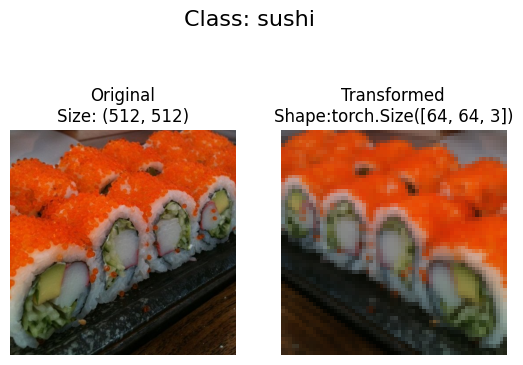

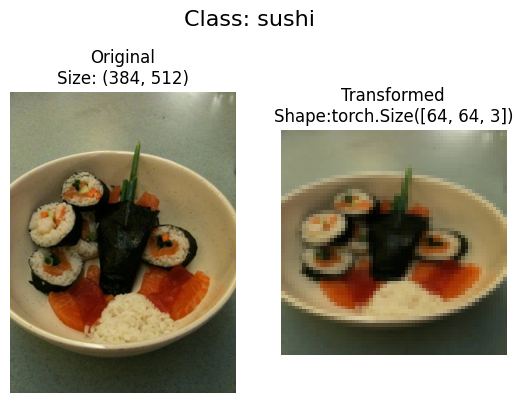

In [15]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape:{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

In [16]:
# 4. Option 1: Loading image data using `Imagefolder`
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [18]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
# Check the lenfths of our dataset
len(train_data), len(test_data)

(225, 75)

In [20]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [21]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute: torch.Size([64, 64, 3]) -> [height, wisth, color_channels]


Text(0.5, 1.0, 'pizza')

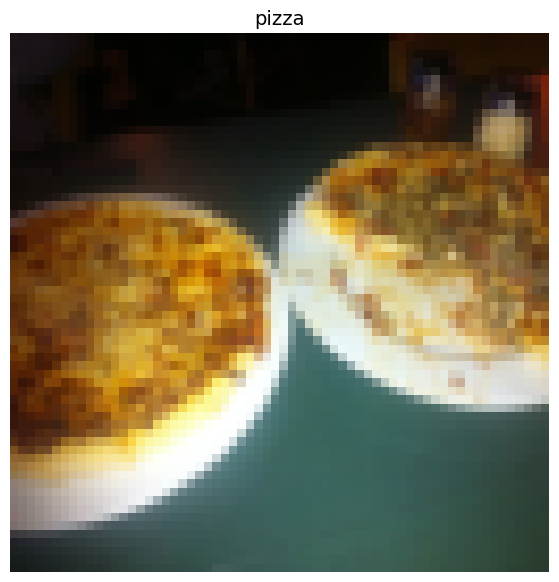

In [22]:
# Rearrange the order dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, wisth, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [23]:
# Turn loaded image into `DataLoader's`

import os
os.cpu_count()

2

In [25]:
# Turn train and test datasets into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79c4f786cb20>,
 <torch.utils.data.dataloader.DataLoader at 0x79c4f786fa60>)

In [26]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [27]:
len(train_data), len(test_data)

(225, 75)

In [28]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


### 3. Recreate model_0 we built in section 7.

In [33]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer
  """
  def __init__(self,
               input_shape:int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride values is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride values is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)

    return x

In [34]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,  # number of color channels in out image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 4. Create training and testing functions for model_0.


In [35]:
# Use `torchinfo` to get an idea of the shapes going through our model
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [36]:
# Create train and test loops functions

# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [41]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc +=((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [42]:
# Creating a `train()` function to combine `train_step()` and `test_step()`
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

### 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?

In [44]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of our test_images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1007 | Train acc: 0.3467 | Test loss: 1.0863 | Test acc: 0.4400
Epoch: 1 | Train loss: 1.0361 | Train acc: 0.4978 | Test loss: 1.0432 | Test acc: 0.4133
Epoch: 2 | Train loss: 1.0075 | Train acc: 0.5511 | Test loss: 1.0049 | Test acc: 0.5067
Epoch: 3 | Train loss: 0.9543 | Train acc: 0.5867 | Test loss: 0.9884 | Test acc: 0.4933
Epoch: 4 | Train loss: 0.9296 | Train acc: 0.5956 | Test loss: 0.9729 | Test acc: 0.5067
Total training time: 15.429 seconds


In [45]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of our test_images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1007 | Train acc: 0.3467 | Test loss: 1.0863 | Test acc: 0.4400
Epoch: 1 | Train loss: 1.0361 | Train acc: 0.4978 | Test loss: 1.0432 | Test acc: 0.4133
Epoch: 2 | Train loss: 1.0075 | Train acc: 0.5511 | Test loss: 1.0049 | Test acc: 0.5067
Epoch: 3 | Train loss: 0.9543 | Train acc: 0.5867 | Test loss: 0.9884 | Test acc: 0.4933
Epoch: 4 | Train loss: 0.9296 | Train acc: 0.5956 | Test loss: 0.9729 | Test acc: 0.5067
Epoch: 5 | Train loss: 0.9101 | Train acc: 0.6089 | Test loss: 0.9990 | Test acc: 0.5067
Epoch: 6 | Train loss: 0.8706 | Train acc: 0.6267 | Test loss: 0.9669 | Test acc: 0.4800
Epoch: 7 | Train loss: 0.8723 | Train acc: 0.6044 | Test loss: 0.9641 | Test acc: 0.5467
Epoch: 8 | Train loss: 0.8256 | Train acc: 0.6844 | Test loss: 0.9896 | Test acc: 0.5200
Epoch: 9 | Train loss: 0.8294 | Train acc: 0.6444 | Test loss: 1.0157 | Test acc: 0.4933
Epoch: 10 | Train loss: 0.7847 | Train acc: 0.6844 | Test loss: 0.9956 | Test acc: 0.5067
Epoch: 11 | Train lo

In [46]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of our test_images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1007 | Train acc: 0.3467 | Test loss: 1.0863 | Test acc: 0.4400
Epoch: 1 | Train loss: 1.0361 | Train acc: 0.4978 | Test loss: 1.0432 | Test acc: 0.4133
Epoch: 2 | Train loss: 1.0075 | Train acc: 0.5511 | Test loss: 1.0049 | Test acc: 0.5067
Epoch: 3 | Train loss: 0.9543 | Train acc: 0.5867 | Test loss: 0.9884 | Test acc: 0.4933
Epoch: 4 | Train loss: 0.9296 | Train acc: 0.5956 | Test loss: 0.9729 | Test acc: 0.5067
Epoch: 5 | Train loss: 0.9101 | Train acc: 0.6089 | Test loss: 0.9990 | Test acc: 0.5067
Epoch: 6 | Train loss: 0.8706 | Train acc: 0.6267 | Test loss: 0.9669 | Test acc: 0.4800
Epoch: 7 | Train loss: 0.8723 | Train acc: 0.6044 | Test loss: 0.9641 | Test acc: 0.5467
Epoch: 8 | Train loss: 0.8256 | Train acc: 0.6844 | Test loss: 0.9896 | Test acc: 0.5200
Epoch: 9 | Train loss: 0.8294 | Train acc: 0.6444 | Test loss: 1.0157 | Test acc: 0.4933
Epoch: 10 | Train loss: 0.7847 | Train acc: 0.6844 | Test loss: 0.9956 | Test acc: 0.5067
Epoch: 11 | Train lo

In [51]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_1 = TinyVGG(input_shape=3, # number of color channels of our test_images
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1114 | Train acc: 0.2844 | Test loss: 1.0994 | Test acc: 0.3333
Epoch: 1 | Train loss: 1.0993 | Train acc: 0.2889 | Test loss: 1.1000 | Test acc: 0.3333
Epoch: 2 | Train loss: 1.0991 | Train acc: 0.3467 | Test loss: 1.1003 | Test acc: 0.3333
Epoch: 3 | Train loss: 1.0989 | Train acc: 0.3467 | Test loss: 1.1004 | Test acc: 0.3333
Epoch: 4 | Train loss: 1.0988 | Train acc: 0.3289 | Test loss: 1.1009 | Test acc: 0.3333
Epoch: 5 | Train loss: 1.0990 | Train acc: 0.3467 | Test loss: 1.1012 | Test acc: 0.3333
Epoch: 6 | Train loss: 1.0987 | Train acc: 0.3467 | Test loss: 1.1012 | Test acc: 0.3333
Epoch: 7 | Train loss: 1.0987 | Train acc: 0.3467 | Test loss: 1.1012 | Test acc: 0.3333
Epoch: 8 | Train loss: 1.0986 | Train acc: 0.3467 | Test loss: 1.1017 | Test acc: 0.3333
Epoch: 9 | Train loss: 1.0987 | Train acc: 0.3467 | Test loss: 1.1019 | Test acc: 0.3333
Epoch: 10 | Train loss: 1.0986 | Train acc: 0.3467 | Test loss: 1.1016 | Test acc: 0.3333
Epoch: 11 | Train lo

### 7. Double the data you're using with your model and train it for 20 epochs, what happens to the results?

In [62]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it..

if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
  print(f"Downloading pizza, steak, sushi 20% data...")
  f.write(request.content)

# unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi 20% data")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi_20_percent directory already exists... skipping download
Unzipping pizza, steak and sushi 20% data


In [63]:
# Setup train and testing paths
train_dir1 = image_path / "train"
test_dir1 = image_path / "test"

train_dir1, test_dir1

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [64]:
# 3. Transforming data
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

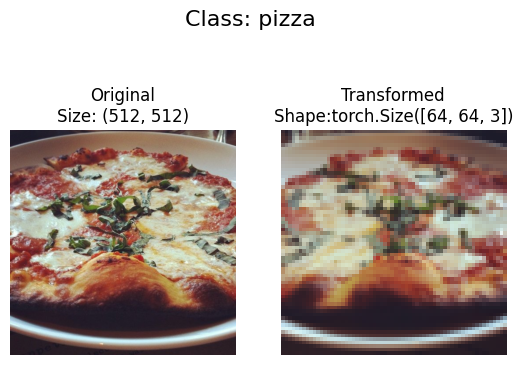

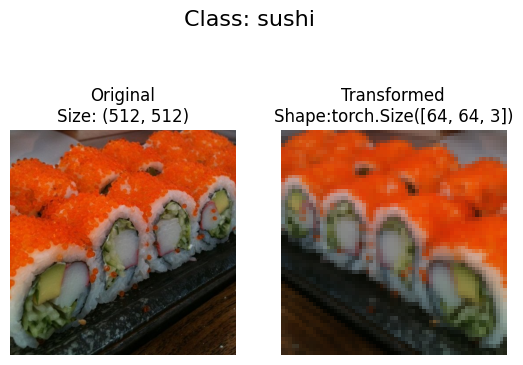

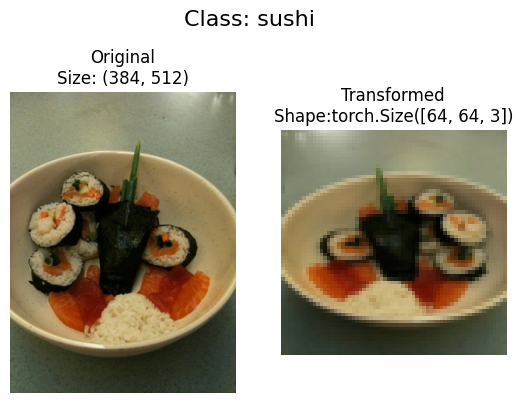

In [65]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape:{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

In [66]:
# 4. Option 1: Loading image data using `Imagefolder`
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data1 = datasets.ImageFolder(root=train_dir1,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target

test_data1 = datasets.ImageFolder(root=test_dir1,
                                 transform=data_transform,)
train_data1, test_data1

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data/pizza_steak_sushi_20_percent/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: data/pizza_steak_sushi_20_percent/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [67]:
# Get class names as list
class_names = train_data1.classes
class_names

['pizza', 'steak', 'sushi']

In [68]:
# Get class names as dict
class_dict = train_data1.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [69]:
# Turn train and test datasets into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader1 = DataLoader(dataset=train_data1,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)
test_dataloader1 = DataLoader(dataset=test_data1,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=False)
train_dataloader1, test_dataloader1

(<torch.utils.data.dataloader.DataLoader at 0x79c50a1df820>,
 <torch.utils.data.dataloader.DataLoader at 0x79c50a0d6f80>)

In [71]:
len(train_dataloader1), len(test_dataloader1)

(450, 150)

In [74]:
# Set random seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_2 = TinyVGG(input_shape=3, # number of color channels of our test_images
                  hidden_units=10,
                  output_shape=len(train_data1.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader1,
                        test_dataloader=test_dataloader1,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.0936 | Train acc: 0.3400 | Test loss: 1.0991 | Test acc: 0.3067
Epoch: 1 | Train loss: 1.0978 | Train acc: 0.3600 | Test loss: 1.0681 | Test acc: 0.4333
Epoch: 2 | Train loss: 1.1825 | Train acc: 0.4400 | Test loss: 1.0691 | Test acc: 0.4333
Epoch: 3 | Train loss: 0.9882 | Train acc: 0.5467 | Test loss: 0.9229 | Test acc: 0.5667
Epoch: 4 | Train loss: 0.9264 | Train acc: 0.5956 | Test loss: 0.8949 | Test acc: 0.6133
Epoch: 5 | Train loss: 0.8912 | Train acc: 0.5889 | Test loss: 0.8884 | Test acc: 0.6200
Epoch: 6 | Train loss: 0.8594 | Train acc: 0.6244 | Test loss: 0.8993 | Test acc: 0.5867
Epoch: 7 | Train loss: 0.8249 | Train acc: 0.6400 | Test loss: 0.8965 | Test acc: 0.5733
Epoch: 8 | Train loss: 0.8138 | Train acc: 0.6489 | Test loss: 0.8964 | Test acc: 0.5600
Epoch: 9 | Train loss: 0.7701 | Train acc: 0.6844 | Test loss: 0.9452 | Test acc: 0.5467
Epoch: 10 | Train loss: 0.7381 | Train acc: 0.6956 | Test loss: 1.0200 | Test acc: 0.5133
Epoch: 11 | Train lo

In [75]:
# Get the model_0_results keys
model_2_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [77]:
from typing import Tuple, Dict, List

In [78]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary."""
  # Get the loss values of the results fictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how many epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

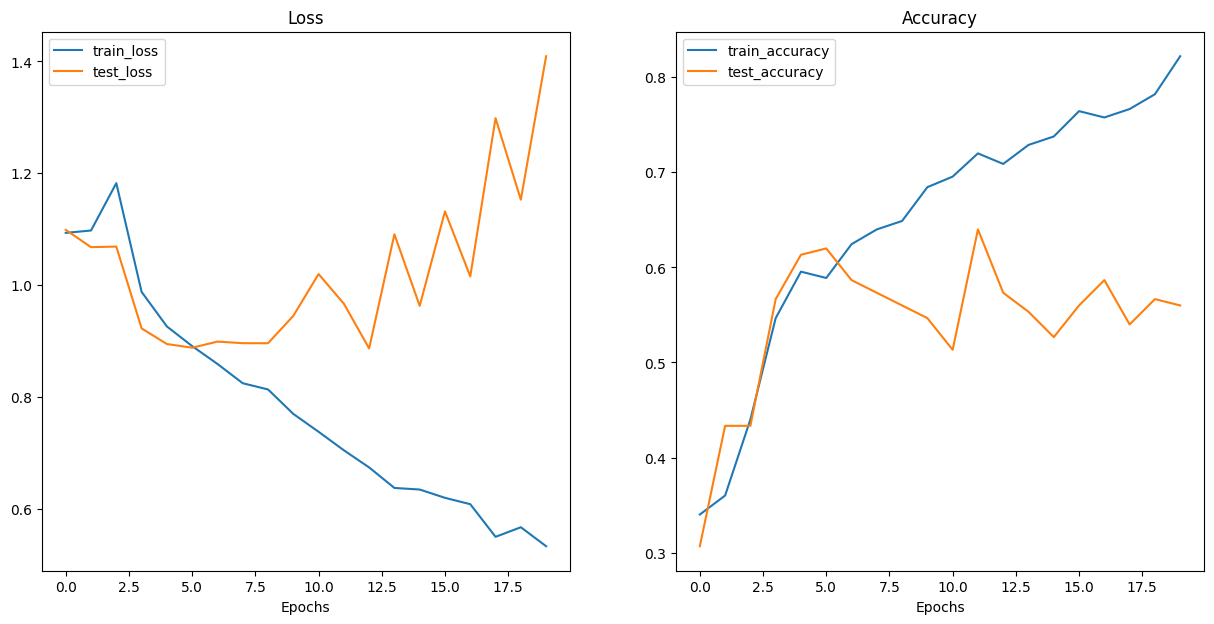

In [79]:
plot_loss_curves(model_2_results)

### 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) and share your prediction.

In [97]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "pizza_001.jpg"

# Download the image if it doesn't already exist
# if not custom_image_path.is_file():
#   with open(custom_image_path, "wb") as f:
#     # When downloading from GitHub, need to use the "raw" file link
#     request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg?raw=true")
#     print(f"Downloading {custom_image_path}...")
#     f.write(request.content)
# else:
#   print(f"{custom_image_path} already exists, skipping download...")

In [98]:
# Loading in a custom image with PyTorch
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(custom_image_path)
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image datatype: {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[ 33,  33,  34,  ...,   9,   7,   7],
         [ 34,  35,  36,  ...,  13,  11,  10],
         [ 38,  38,  39,  ...,  20,  18,  16],
         ...,
         [121, 125, 134,  ..., 184, 178, 173],
         [141, 147, 156,  ..., 198, 189, 181],
         [158, 163, 170,  ..., 216, 205, 195]],

        [[ 28,  28,  29,  ...,   0,   0,   0],
         [ 29,  30,  31,  ...,   4,   2,   1],
         [ 33,  33,  34,  ...,  10,   8,   6],
         ...,
         [104, 108, 117,  ..., 179, 173, 168],
         [123, 129, 138,  ..., 193, 184, 176],
         [140, 145, 150,  ..., 211, 200, 190]],

        [[ 24,  24,  25,  ...,   0,   0,   0],
         [ 25,  26,  27,  ...,   0,   0,   0],
         [ 29,  29,  30,  ...,   1,   0,   0],
         ...,
         [ 84,  88,  97,  ..., 175, 169, 164],
         [101, 107, 116,  ..., 189, 180, 172],
         [116, 121, 126,  ..., 207, 196, 186]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 1000, 1500])
Custom image data

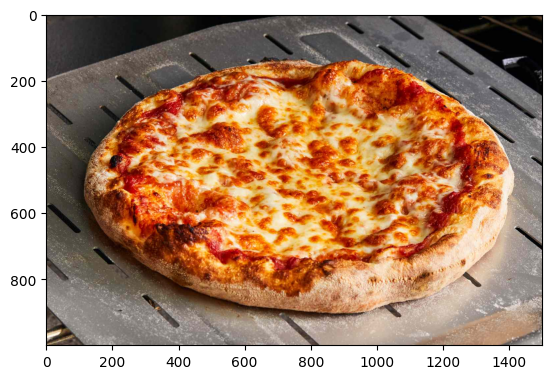

In [99]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))

In [100]:
# Create transform pipeline to resize image
from torchvision import transforms
custom_image_transform =  transforms.Compose([
    transforms.Resize(size=(64, 64))
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image_uint8)

# Print out the shapes
print(f"Original shape: {custom_image_uint8 .shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 1000, 1500])
Transformed shape: torch.Size([3, 64, 64])


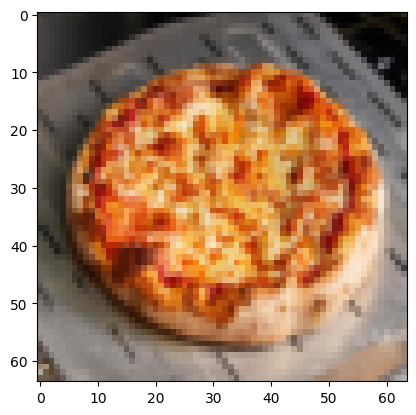

In [101]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [102]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [103]:
model_2.eval()
with torch.inference_mode():
    custom_image_transformed = custom_image_transformed.unsqueeze(0).to(device).float()
    custom_image_pred = model_2(custom_image_transformed)

custom_image_pred

tensor([[ 0.7333, -0.8091, -0.0701]])

In [104]:
class_names

['pizza', 'steak', 'sushi']

In [105]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.6018, 0.1287, 0.2695]])

In [106]:
# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_label

tensor([0])

In [107]:
class_names[custom_image_pred_label]

'pizza'